In [0]:
import os      #importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score 
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as seabornInstance 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
#setting the directory

os.chdir('U:\\final report\\without cheating variable')

In [0]:
#importing  the data sets

dt=pd.read_excel('LUSC.xlsx',index_col=0) 

In [0]:
dt.shape

(501, 14885)

In [0]:
# creating subsets for features and target variable

X=dt.iloc[:,0:14883].values
y=dt.iloc[:,-1].values

In [0]:
#splitting data to training, testing , validation set (80/20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.fit_transform(X_val)

sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.fit_transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.fit_transform(y_test.reshape(-1, 1)))

In [0]:
#a#applyign lasso regression model
lassoReg=Lasso(alpha=100,normalize=False)
lassoReg.fit(X_train, y_train) #training the algorithm

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
#predicting on validation split

y_predval = lassoReg.predict(X_val)

In [0]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % lassoReg.score(X_val, y_val))

0.7288094452726452
0.9999999999999997
0.9999999999999998
Variance score: 0.00


In [0]:
# KFOlD
estimator = lassoReg
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[-1.17261546e-02 -7.97684342e-03 -3.29854449e-02 -2.41054284e-05
 -1.79592347e-02 -8.60108596e-02 -2.03642312e-03 -6.26346616e-04
 -4.27990659e-02 -1.21806861e-02]
-0.021432516434493974 0.025299636047300803


In [0]:
# Hyper parameter optimization

tuned_parameters = {'alpha':[0.1,0.5,1.10,20,30,50,100],
                     'fit_intercept':[True,False],
                     'max_iter':[1,2,5,10,20],
                     'random_state':[0,1,42],
                    'tol':[0.001,0.1,0.5]}
lassoReg=Lasso()
grid=GridSearchCV(lassoReg,tuned_parameters,scoring='r2',verbose=1,cv=10)    
grid.fit(X_train,y_train)
print(grid.best_estimator_)

In [0]:
print(grid.best_params_)

{'alpha': 0.1, 'fit_intercept': False, 'max_iter': 5, 'random_state': 0, 'tol': 0.1}


In [0]:
#fitting model with new parameters
lassoReg=Lasso(alpha= 0.1, fit_intercept= False, max_iter=5, random_state= 0, tol= 0.1)
lassoReg.fit(X_train,y_train)
y_predval=lassoReg.predict(X_val)
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % lassoReg.score(X_val, y_val))

0.3926558024896602
0.2978399599870974
0.545747157562087
Variance score: 0.70


In [0]:
# KFOlD
estimator = lassoReg
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[0.62189958 0.82488599 0.7079456  0.71438221 0.59036432 0.76406612
 0.87109304 0.56562481 0.86183964 0.78923952]
0.7311340840857481 0.10482489736920605


In [0]:
                                  '''APPYING MODEL ON TESTING DATA SET'''
lassoReg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lassoReg.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % lassoReg.score(X_test, y_test))


0.3297436671800549
0.2661745656741854
0.5159210847350449
Variance score: 0.73


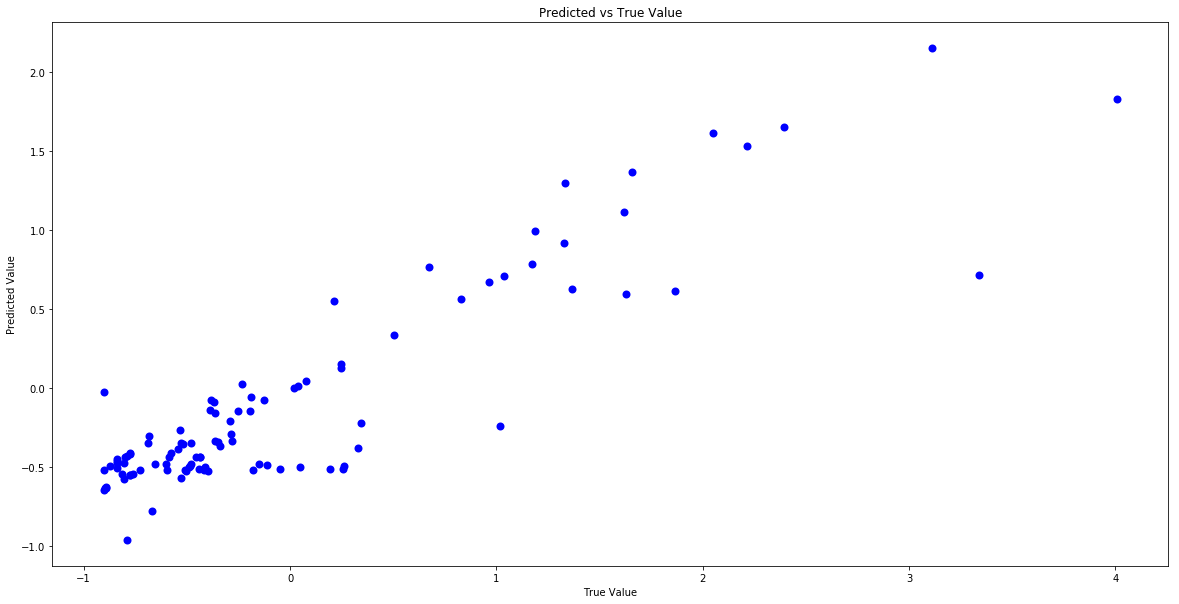

In [0]:
#True Value ~ Predicted Values

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()